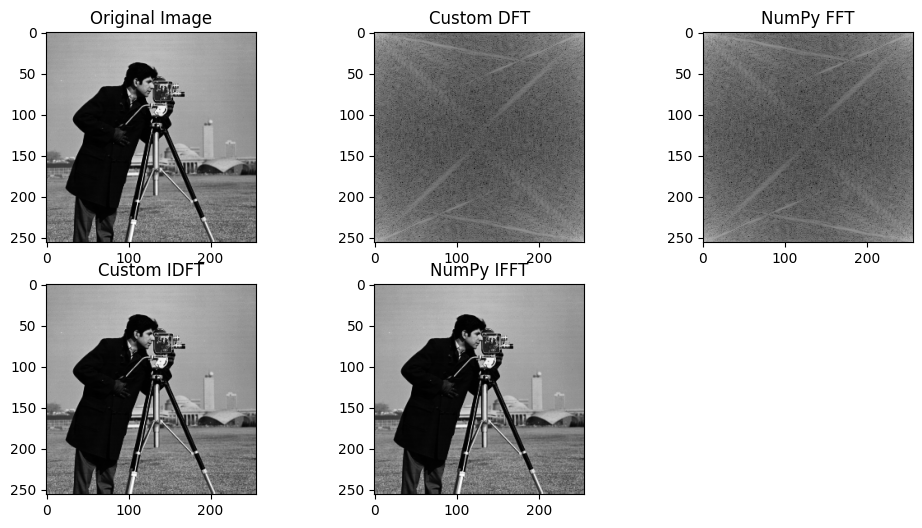

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from imageio.v3 import imread

def dft2(img):
    transformed = np.apply_along_axis(fft, 1, img)  # DFT along rows
    transformed = np.apply_along_axis(fft, 0, transformed)  # DFT along columns
    return transformed

def idft2(freq_img):
    reconstructed = np.apply_along_axis(ifft, 1, freq_img)  # IDFT along rows
    reconstructed = np.apply_along_axis(ifft, 0, reconstructed)  # IDFT along columns
    return reconstructed.real  # Return only the real part

img = imread('cameraman.tif').astype(np.float32)

dft_custom = dft2(img)
dft_numpy = np.fft.fft2(img)

idft_custom = idft2(dft_custom)
idft_numpy = np.fft.ifft2(dft_numpy).real

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(np.log1p(np.abs(dft_custom)), cmap='gray'), plt.title('Custom DFT')
plt.subplot(233), plt.imshow(np.log1p(np.abs(dft_numpy)), cmap='gray'), plt.title('NumPy FFT')
plt.subplot(234), plt.imshow(idft_custom, cmap='gray'), plt.title('Custom IDFT')
plt.subplot(235), plt.imshow(idft_numpy, cmap='gray'), plt.title('NumPy IFFT')
plt.show()